In [3]:
%matplotlib auto

Using matplotlib backend: MacOSX


In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
matplotlib.interactive(True)

In [6]:
anthropometry = [0 for i in range(17)]

In [19]:
def get_morphed_image(img):
    # Four corners of the book in source image
    plt.figure(figsize=(10,10), frameon=False)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.imshow(img)
    print("Please click")
    points = plt.ginput(4, show_clicks=True)
    print("clicked", points)
    plt.close('all')
    
    points = np.array(points)
    points_new = np.array([(points[0][0], points[0][1]), (points[0][0]+850, points[0][1]), 
                                 (points[0][0]+850, points[0][1]+1100), (points[0][0], points[0][1]+1100)])
    print(points_new)
    
    # Calculate Homography
    h, status = cv2.findHomography(points, points_new)
    
    # Warp source image to destination based on homography
    im_out = cv2.warpPerspective(img, h, (img.shape[1], img.shape[0]))
    
    return im_out

def get_measurement(morphed_img):
    plt.figure(figsize=(10,10), frameon=False)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.imshow(morphed_img)
    print("Please click")
    dist = plt.ginput(2)
    print("clicked", dist)
    plt.close('all')

    distance = np.sqrt(np.sum((np.array(dist)[0] - np.array(dist)[1])**2))*2.54/100
    print(distance, 'cm')

    return distance

def get_measurement_center(center, morphed_img):
    plt.figure(figsize=(10,10), frameon=False)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    plt.plot(center[0], center[1], 'bo')
    plt.imshow(morphed_img)
    print("Please click")
    dist = plt.ginput(1)
    print("clicked", dist)
    plt.close('all')

    distance = np.sqrt(np.sum((np.array(dist)[0] - center)**2))*2.54/100
    print(distance, 'cm')

    return distance

# Flatten out Image

In [8]:
# Read source image.
im_front = plt.imread('images/front.jpg')
im_side = plt.imread('images/side.jpg')

In [9]:
im_front_warped = get_morphed_image(im_front)

Please click
clicked [(1763.5, 327.09999999999945), (2952.94, 276.69999999999936), (2852.14, 1783.6599999999994), (1753.42, 1783.6599999999994)]
[[1763.5  327.1]
 [2613.5  327.1]
 [2613.5 1427.1]
 [1763.5 1427.1]]


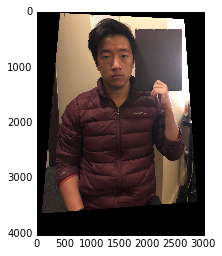

In [10]:
%matplotlib inline
plt.imshow(im_front_warped)
plt.show()

In [11]:
%matplotlib auto
im_side_warped = get_morphed_image(im_side)

Using matplotlib backend: MacOSX
Please click
clicked [(170.85999999999996, 967.1799999999994), (1400.6200000000001, 1002.4599999999996), (1395.58, 2433.8199999999997), (251.49999999999994, 2479.1799999999994)]
[[ 170.86  967.18]
 [1020.86  967.18]
 [1020.86 2067.18]
 [ 170.86 2067.18]]


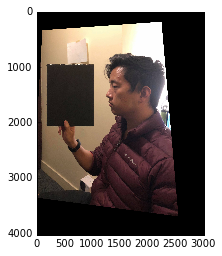

In [12]:
%matplotlib inline
plt.imshow(im_side_warped)
plt.show()

# Get Measurements

## Get center of head

In [13]:
%matplotlib auto

Using matplotlib backend: MacOSX


In [21]:
plt.figure(figsize=(10,10), frameon=False)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.imshow(im_side_warped)
print("Please click")
center = plt.ginput(1)[0]
print("clicked", center)
plt.close('all')

Please click
clicked (1733.2600000000002, 1385.4999999999995)


## x1 head width

In [22]:
anthropometry[0] = get_measurement(im_front_warped)

Please click
clicked [(1062.94, 856.2999999999997), (1733.2600000000002, 826.0599999999995)]
17.04344466760168 cm


## x2 head height

In [23]:
anthropometry[1] = get_measurement(im_side_warped)

Please click
clicked [(1813.9, 936.9399999999996), (1778.62, 1884.4599999999996)]
24.08368515797796 cm


## x3 head depth

In [24]:
anthropometry[2] = get_measurement(im_side_warped)

Please click
clicked [(1294.78, 1254.4599999999996), (2297.7400000000002, 1289.7399999999993)]
25.490939891467328 cm


## x4 pinna offset down

In [25]:
anthropometry[3] = get_measurement_center(center, im_side_warped)

Please click
clicked [(1733.2600000000002, 1506.4599999999996)]
3.072384000000001 cm


## x5 pinna offset back

In [26]:
anthropometry[4] = get_measurement_center(center, im_side_warped)

Please click
clicked [(1904.62, 1380.4599999999996)]
4.354426181277153 cm


## x6 neck width

In [27]:
anthropometry[5] = get_measurement(im_front_warped)

Please click
clicked [(1183.9, 1309.8999999999996), (1672.7800000000002, 1325.0199999999995)]
12.423489467094505 cm


## x7 neck height

In [28]:
anthropometry[6] = get_measurement(im_side_warped)

Please click
clicked [(1506.46, 1894.5399999999995), (1496.38, 2086.0599999999995)]
4.871341024675648 cm


## x8 neck depth

In [29]:
anthropometry[7] = get_measurement(im_side_warped)

Please click
clicked [(1607.2600000000002, 1990.2999999999995), (2151.58, 1960.0599999999995)]
13.847047562393934 cm


## x9 torso top width

In [30]:
anthropometry[8] = get_measurement(im_front_warped)

Please click
clicked [(815.98, 2121.3399999999992), (2086.06, 2096.1399999999994)]
32.266381375162354 cm


## x10 torso top height

In [31]:
anthropometry[9] = get_measurement(im_side_warped)

Please click
clicked [(1622.38, 2131.4199999999996), (1566.94, 2993.2599999999993)]
21.935981452140947 cm


## x11 torso top depth

In [32]:
anthropometry[10] = get_measurement(im_side_warped)

Please click
clicked [(1254.46, 2932.7799999999997), (2393.5, 2988.2199999999993)]
28.965865497485694 cm


## x12 shoulder width

In [33]:
anthropometry[11] = get_measurement(im_front_warped)

Please click
clicked [(427.8999999999999, 2005.4199999999996), (2408.62, 1939.8999999999996)]
50.33780554325156 cm


## x13 head offset forward

In [35]:
anthropometry[12] = get_measurement_center(center, im_side_warped)

Please click
clicked [(1869.3400000000001, 1385.4999999999995)]
3.456431999999998 cm


## x14 height in Inches

In [56]:
def f(x):
    anthropometry[13]= x * 12 * 2.54
    print(anthropometry[13] / 12 / 2.54, 'ft')
interact(f, x=(0.0,10.0,1/12));
# anthropometry[13] = get_measurement(im_side_warped)

5.83333 ft


## x15 seated height

In [56]:
def f(x):
    anthropometry[13]= x * 12 * 2.54
    print(anthropometry[13] / 12 / 2.54, 'ft')
interact(f, x=(0.0,10.0,1/12));
# anthropometry[13] = get_measurement(im_side_warped)

5.83333 ft


## x16 head circumference

In [56]:
def f(x):
    anthropometry[14]= x * 12 * 2.54
    print(anthropometry[13] / 12 / 2.54, 'ft')
interact(f, x=(0.0,10.0,1/12));
# anthropometry[13] = get_measurement(im_side_warped)

5.83333 ft


## x17 shoulder circumference

In [56]:
def f(x):
    anthropometry[15]= x * 12 * 2.54
    print(anthropometry[13] / 12 / 2.54, 'ft')
interact(f, x=(0.0,10.0,1/12));
# anthropometry[13] = get_measurement(im_side_warped)

5.83333 ft
